# Content

6. EDA <br>

# 6. EDA

In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#set figsize for sns plots
sns.set(rc={'figure.figsize':(10,6)})

#Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

#Load csv file
df_train_clean = pd.read_csv("../Dataset/train_clean.csv")

List out and take a look at all the categorial features

In [2]:
df_train_clean.select_dtypes(include=['object']).dtypes

ms_zoning         object
street            object
lot_shape         object
land_contour      object
utilities         object
lot_config        object
land_slope        object
neighborhood      object
condition_1       object
condition_2       object
bldg_type         object
house_style       object
roof_style        object
roof_matl         object
exterior_1st      object
exterior_2nd      object
mas_vnr_type      object
exter_qual        object
exter_cond        object
foundation        object
bsmt_qual         object
bsmt_cond         object
bsmt_exposure     object
bsmtfin_type_1    object
bsmtfin_type_2    object
heating           object
heating_qc        object
central_air       object
electrical        object
kitchen_qual      object
functional        object
fireplace_qu      object
garage_type       object
garage_finish     object
garage_qual       object
garage_cond       object
paved_drive       object
sale_type         object
dtype: object

For each feature, we will take a look at the histogram/countplot and boxplot (if further analysis is required) before determining if we are keeping or dropping the feature for our model. Outliers can be seen from the boxplots, which we will not be removed to mimic real-life scenarios of outliers in datasets. <br>

If any of the features have categories which are more than 75% of the total count, we will not be selecting them for our modelling unless specified.

In [3]:
#create function to gen histplot

def histplot(feature):
    ax = sns.histplot(x = feature, data = df_train_clean, stat='percent')
    plt.title('Histogram of ' + feature)
    ax.axhline(75, color='r', linestyle="--")
    ax.bar_label(ax.containers[0], fmt='%.1f%%');

1. ms_zoning: Proportion of houses which are under RL (Residential Low Density) forms the majority (>75%). To drop this feature for modelling.

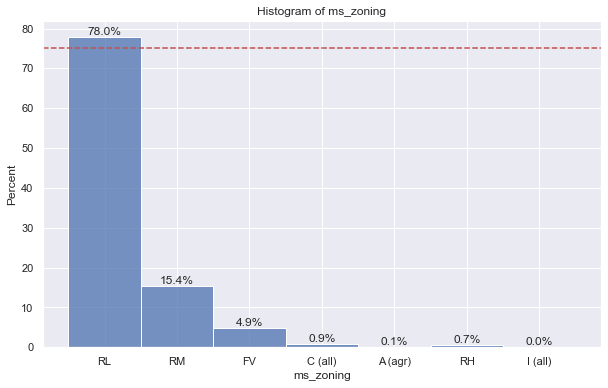

In [4]:
histplot('ms_zoning')

2. street: Proportion of houses where the type of road access to property is Paved (Pave) forms the majority (>75%). To drop this feature for modelling.

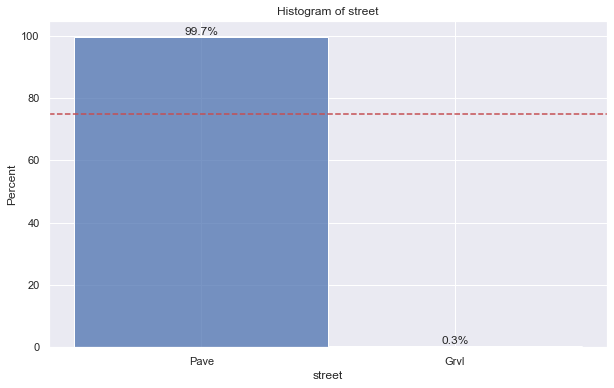

In [5]:
histplot('street')

3. lot_shape: Proportion of houses where the general shape of property is IR1 (Slightly Irregular) or Reg (Regular) forms the majority (sum of both is > 75%). To drop this feature for modelling.

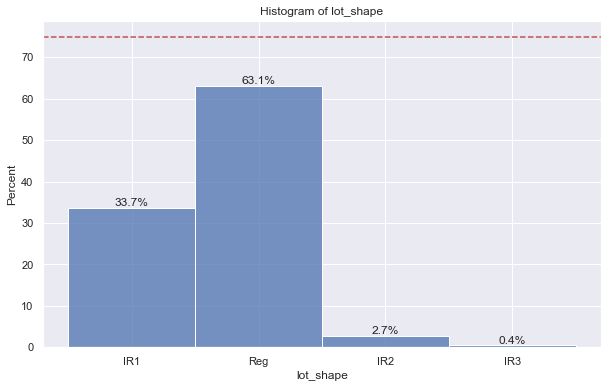

In [6]:
histplot('lot_shape')

4. land_contour: Proportion of houses where the flatness of property is Lvl (Near Flat/Level) forms the majority (>75%). To drop this feature for modelling.

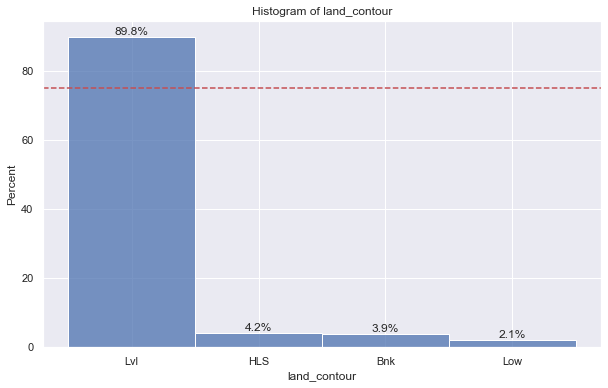

In [7]:
histplot('land_contour')

5. utilies: Proportion of houses where the type of utilities available is AllPub (all public utilities) forms the majority (>75%). To drop this feature for modelling.

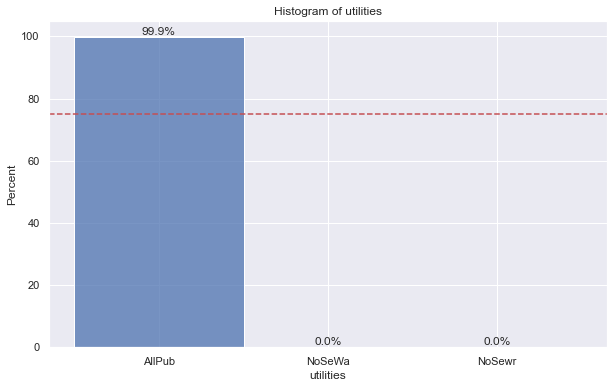

In [8]:
histplot('utilities')

6. lot_config: Proportion of houses where the lot configuration is Inside (Inside Lot) or Corner (Corner Lot) forms the majority (sum of both > 75%). To drop this feature for modelling.

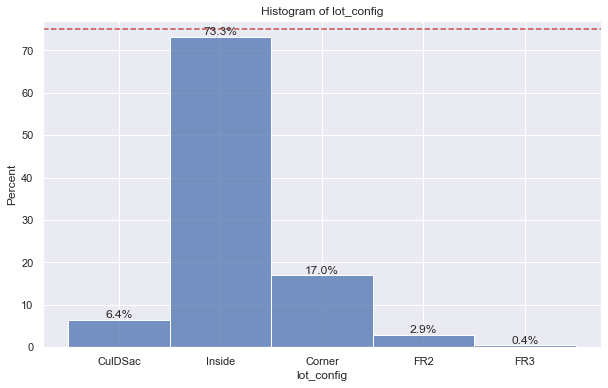

In [9]:
histplot('lot_config')

7. land_slope: Proportion of houses where the slope of property is Gtl (Gentle Slope) forms the majority (>75%). To drop this feature for modelling.

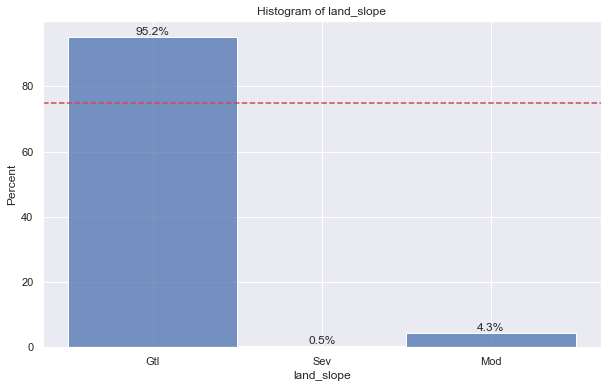

In [10]:
histplot('land_slope')

8. neighborhood: Houses have a variety of neighborhood within Ames. To keep this feature for modelling.

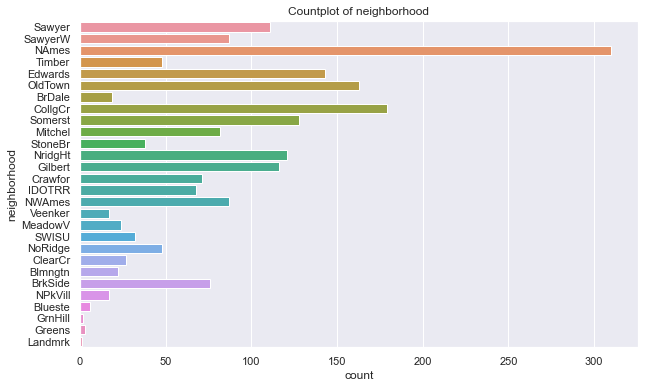

In [11]:
sns.countplot(y='neighborhood', data = df_train_clean)
plt.title('Countplot of neighborhood');

Based on the boxplot, sale price varies across the different type of neighborhood. We want to select such features for our regression model. Houses in StoneBr and NridgHt has higher median saleprice than the rest of the neighborhood probably due to their proximity to the Iowa State University (of which 1/2 of the population in Ames are students attending the University) ([*source*](https://www.cityofames.org/about-ames/about-ames)) and Gilbert School District ([*source*](https://www.hunzikerdevelopment.com/active-developments/northridge-heights/)).

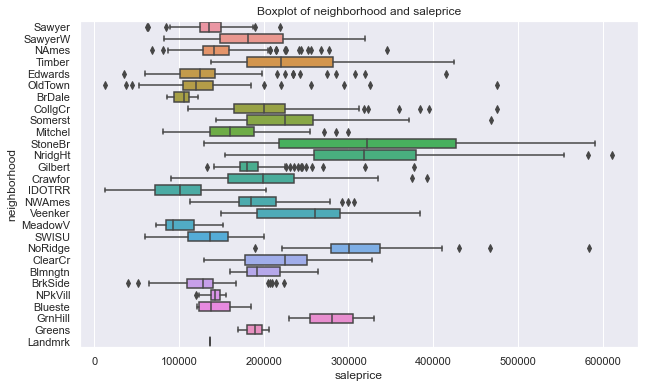

In [12]:
sns.boxplot(y='neighborhood', x = 'saleprice', data = df_train_clean)
plt.title('Boxplot of neighborhood and saleprice');

9. condition_1: Proportion of houses where the proximity to various condition is Norm (Normal) forms the majority (>75%). To drop this feature for modelling.

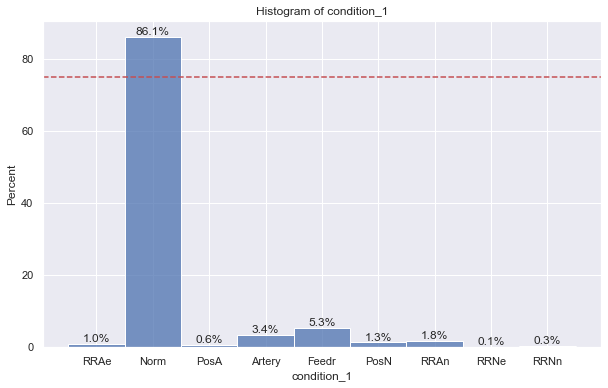

In [13]:
histplot('condition_1')

10. condition_2:  Proportion of houses where the proximity to various condition is Norm (Normal) forms the majority (>75%). To drop this feature for modelling.

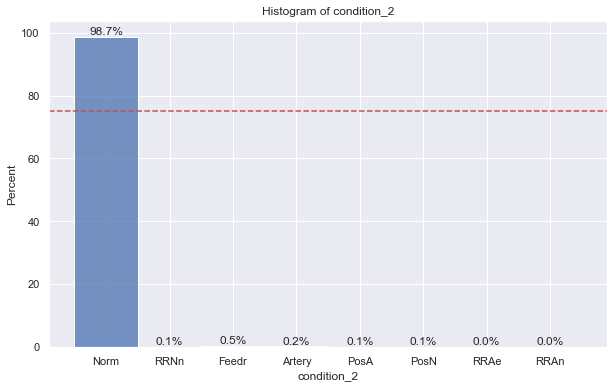

In [14]:
histplot('condition_2')

11. bldg_type: Proportion of houses where the type of dwelling is 1Fam (Single-family Detached) forms the majority (>75%). To drop this feature for modelling.

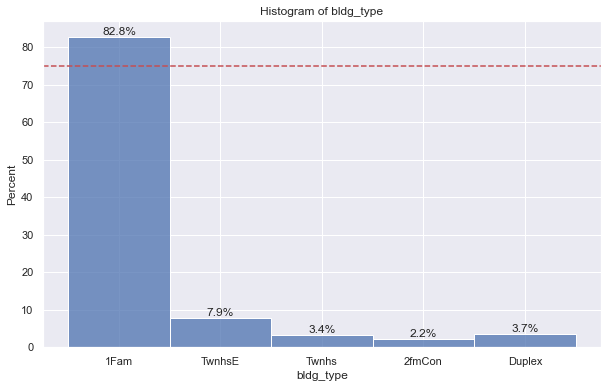

In [15]:
histplot('bldg_type')

12. house_style: Proportion of houses where the style of dwelling is 1Story or 2Story forms the majority (sum of both > 75%). To drop this feature for modelling.

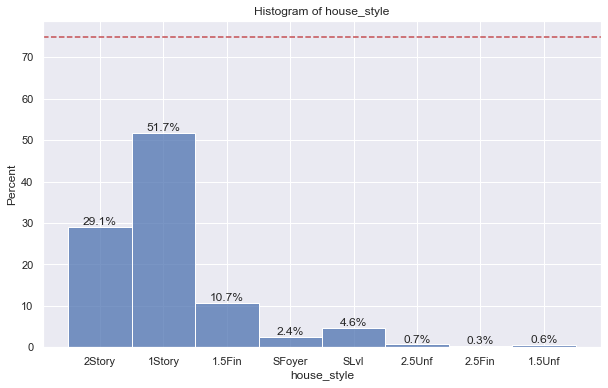

In [16]:
histplot('house_style')

13. roof_style: Proportion of houses where the type of roof is Gable forms the majority (>75%). To drop this feature for modelling.

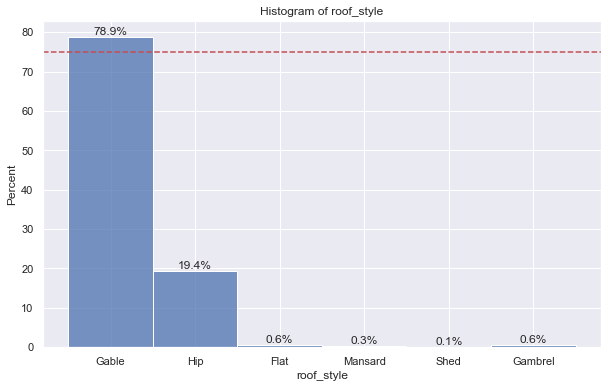

In [17]:
histplot('roof_style')

14. roof_matl: Proportion of houses where the roof material is CompShg (Standard (Composite) Shingle) forms the majority (>75%). To drop this feature for modelling.

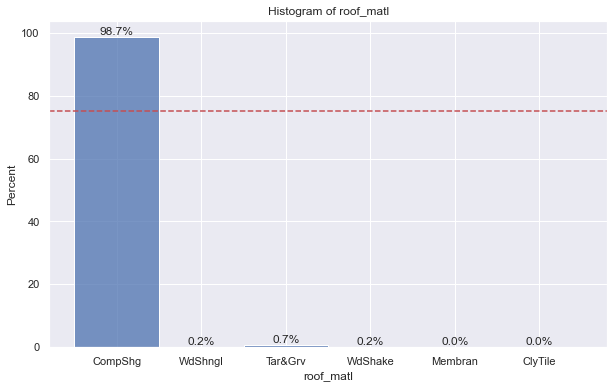

In [18]:
histplot('roof_matl')

15. exterior_1st: Houses have a variety of Exterior covering. To keep this feature for modelling.

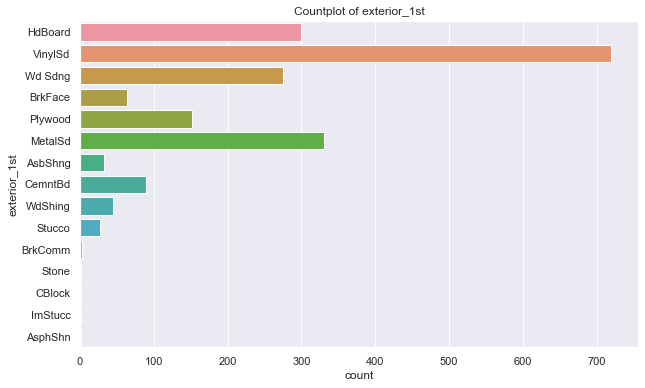

In [19]:
sns.countplot(y='exterior_1st', data = df_train_clean)
plt.title('Countplot of exterior_1st');

Based on the boxplot, sale price varies across the different type of exterior covering. We want to select such features for our regression model. CemntBd is likely a superior exterior material which is probably why the median saleprice for houses with such material is much higher than the other materials.

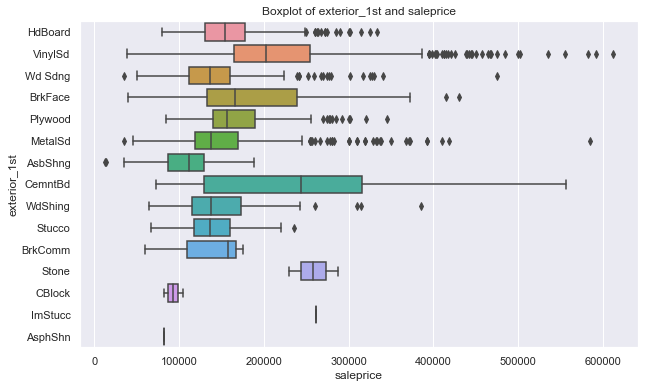

In [20]:
sns.boxplot(y='exterior_1st', x = 'saleprice', data = df_train_clean)
plt.title('Boxplot of exterior_1st and saleprice');

16. exterior_2nd: Houses have a variety of second Exterior covering. To keep this feature for modelling.

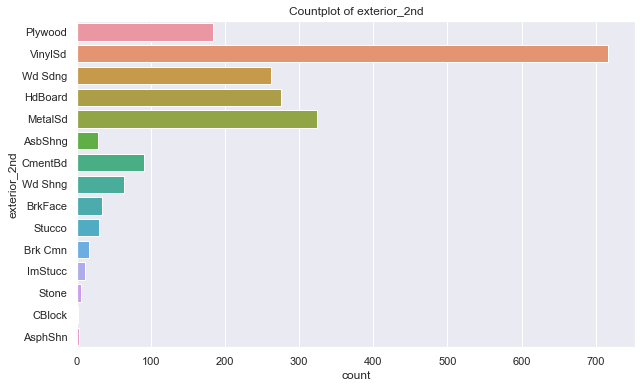

In [21]:
sns.countplot(y='exterior_2nd', data = df_train_clean)
plt.title('Countplot of exterior_2nd');

Based on the boxplot, sale price varies across the different type of second exterior covering. We want to select such features for our regression model. Similarly, houses with CmentBd exterior has a higher median saleprice.

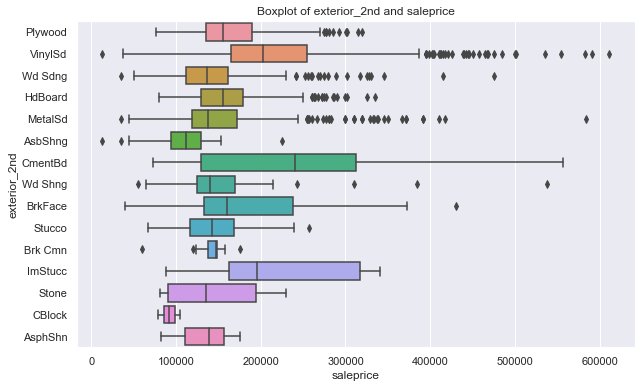

In [22]:
sns.boxplot(y='exterior_2nd', x = 'saleprice', data = df_train_clean)
plt.title('Boxplot of exterior_2nd and saleprice');

17. mas_vnr_type: Proportion of houses where the masonry veneer type is BrkFace (Brick Face) or None forms the majority (sum of both >75%). To drop this feature for modelling.

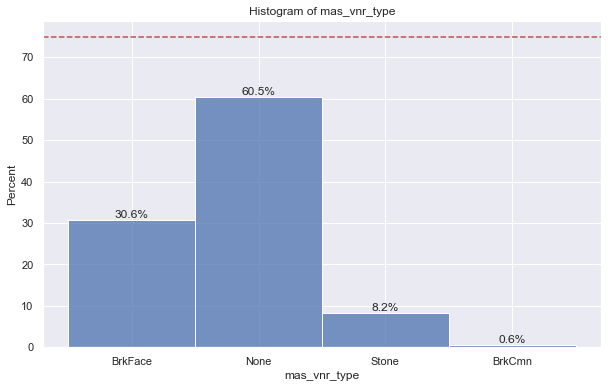

In [23]:
histplot('mas_vnr_type')

18. exter_qual: Proportion of houses where the quality of material on the exterior of property is Gd (good) or TA (average/typical) forms the majority (>75%). However, based on the boxplot, we will select this feature for modelling.

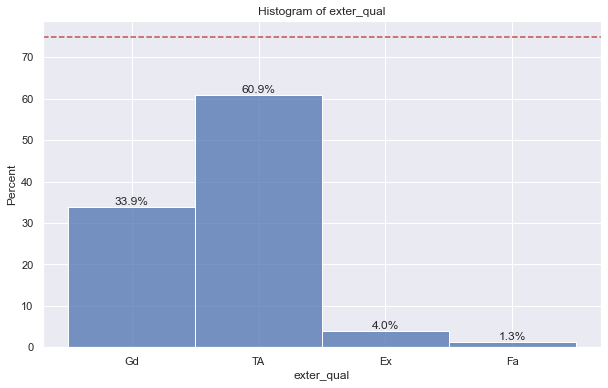

In [24]:
histplot('exter_qual')

Based on the boxplot, sale price varies across the different type of exterior material quality of the property. We want to select such features for our regression model. Excellent rating on the exterior material of the property would drive up the median saleprice of properties.

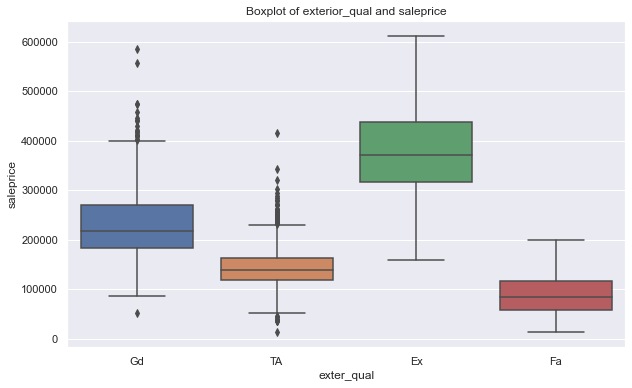

In [25]:
sns.boxplot(x='exter_qual', y = 'saleprice', data = df_train_clean)
plt.title('Boxplot of exterior_qual and saleprice');

19. exter_cond: Proportion of houses where the present condition of the material on the exterior of property is TA (average/typical) forms the majority (>75%). To drop this feature for modelling.

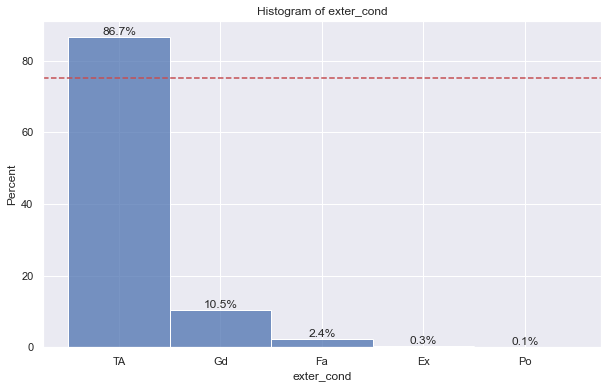

In [26]:
histplot('exter_cond')

20. foundation: Houses have a variety of foundation. To keep this feature for modelling.

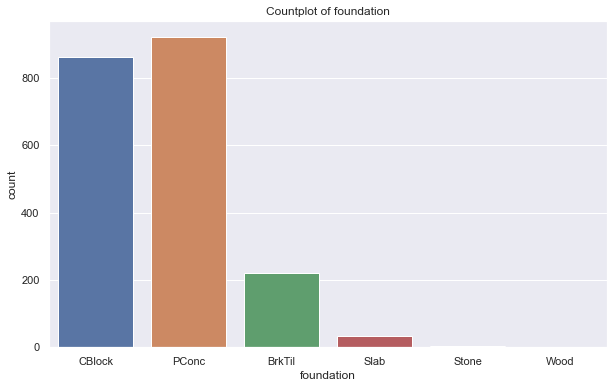

In [27]:
sns.countplot(x='foundation', data = df_train_clean)
plt.title('Countplot of foundation');

Based on the boxplot, sale price varies across the different type of foundation. We want to select such features for our regression model. Houses with PConc foundation has a higher median saleprice than the other foundation types.

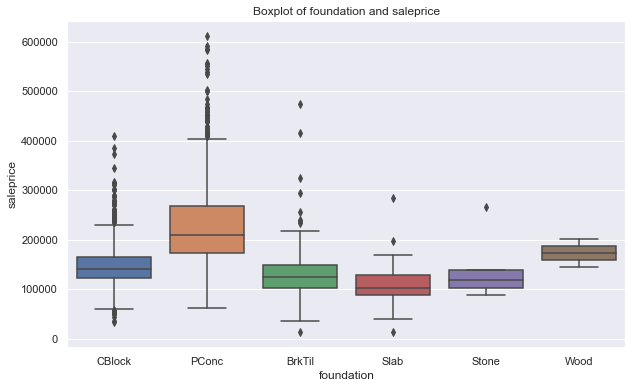

In [28]:
sns.boxplot(x='foundation', y = 'saleprice', data = df_train_clean)
plt.title('Boxplot of foundation and saleprice');

21. bsmt_qual: Houses have a variety of height of basement. To keep this feature for modelling.

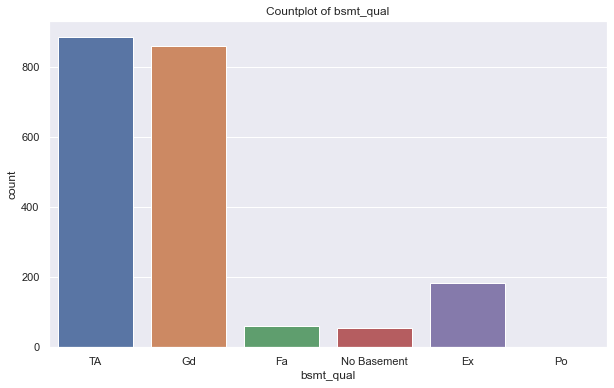

In [29]:
sns.countplot(x = 'bsmt_qual', data = df_train_clean)
plt.title('Countplot of bsmt_qual');

Based on the boxplot, sale price varies across the different type of basement height. We want to select such features for our regression model. As expected, houses with basement quality excellent, good and typical would drive up the saleprice of houses.

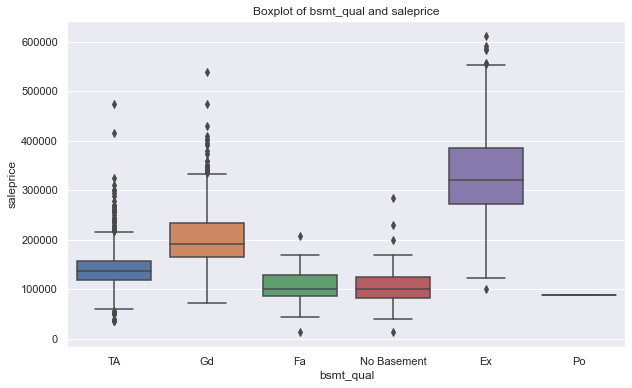

In [30]:
sns.boxplot(x='bsmt_qual', y = 'saleprice', data = df_train_clean)
plt.title('Boxplot of bsmt_qual and saleprice');

22. bsmt_cond: Proportion of houses where the basmenet condition is TA (typical) forms the majority (>75%). To drop this feature for modelling.

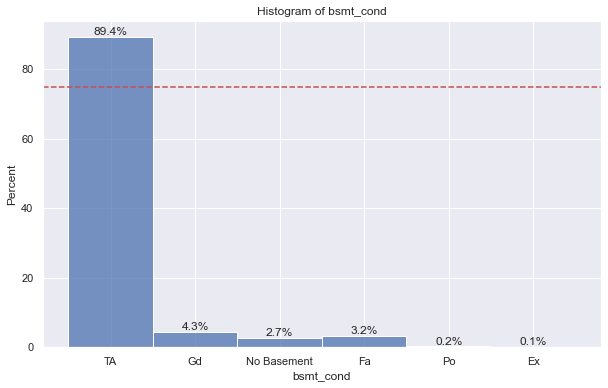

In [31]:
histplot('bsmt_cond')

23. bsmt_exposure: Proportion of houses where there is no basement exposure forms the majority (<75%) with a good range of houses in other ratings. Based on boxplot, we will select this feature for modelling.

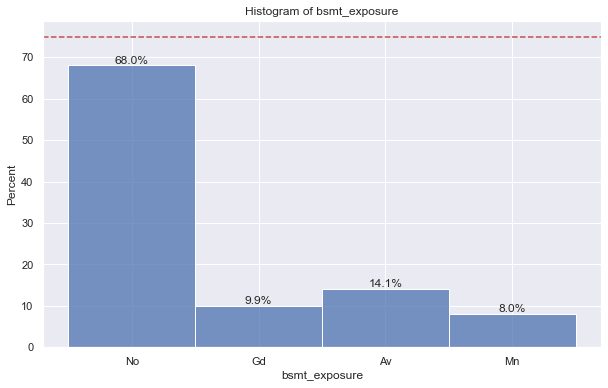

In [32]:
histplot('bsmt_exposure')

Based on the boxplot, sale price varies across the different type of basement exposure. We want to select such features for our regression model. Saleprice decreases with decreasing quality of basement exposure.

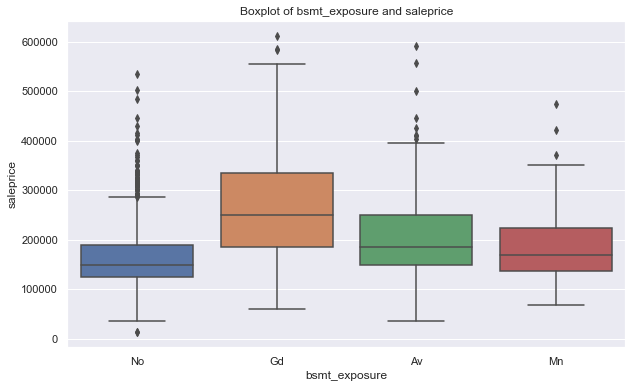

In [33]:
sns.boxplot(x='bsmt_exposure', y = 'saleprice', data = df_train_clean)
plt.title('Boxplot of bsmt_exposure and saleprice');

24. bsmtfin_type_1: Houses have a variety of rating of basement finish area. To keep this feature for modelling.

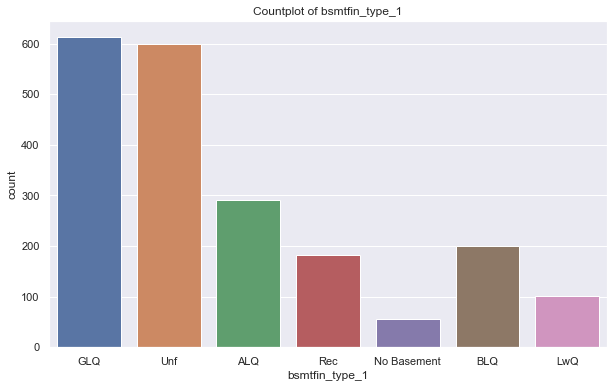

In [34]:
sns.countplot(x = 'bsmtfin_type_1', data = df_train_clean)
plt.title('Countplot of bsmtfin_type_1');

Based on the boxplot, sale price varies across the different rating of basement finish area. Houses with GLQ rating of basement finish area can be distinguished by the higher median saleprice. However, the other ratings have median saleprice between 100-200K.

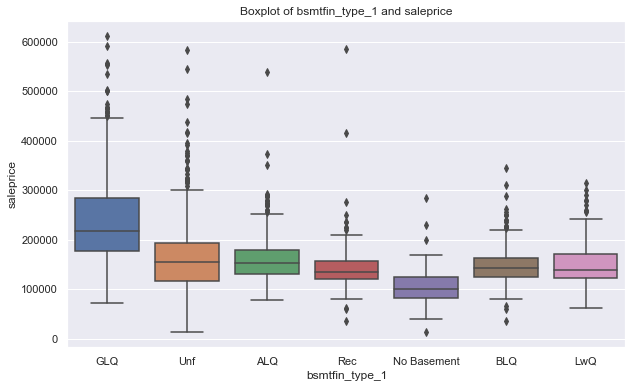

In [35]:
sns.boxplot(x='bsmtfin_type_1', y = 'saleprice', data = df_train_clean)
plt.title('Boxplot of bsmtfin_type_1 and saleprice');

25. bsmtfin_type_2: Proportion of houses where the Rating of basement finished area is Unf (unfinished) forms the majority (>75%). To drop this feature for modelling.

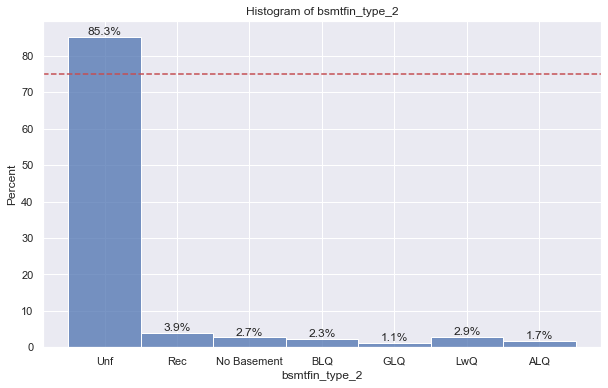

In [36]:
histplot('bsmtfin_type_2')

26. heating: Proportion of houses where the type of heating is GasA (Gas forced warm air furnace) forms the majority (>75%). To drop this feature for modelling.

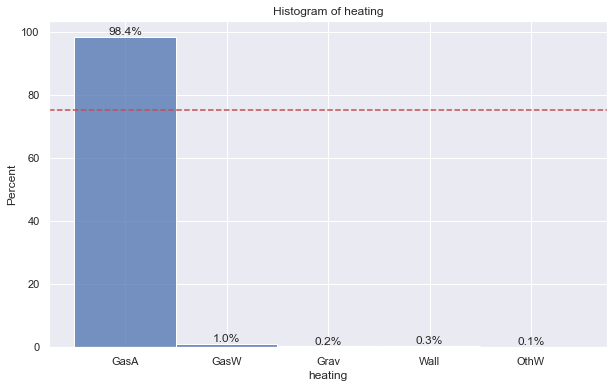

In [37]:
histplot('heating')

27. heating_qc: Houses have a various heating quality and condition. To keep this feature for modelling.

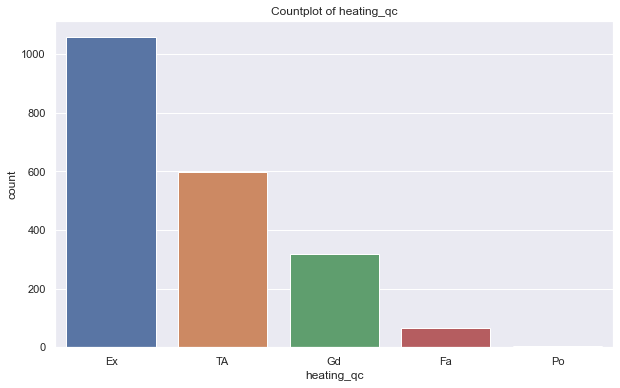

In [38]:
sns.countplot(x = 'heating_qc', data = df_train_clean)
plt.title('Countplot of heating_qc');

Based on the boxplot, sale price varies across the different heating quality and condition. We want to select such features for our regression model. Median saleprice of houses decreases with decreasing heating quality and condition.

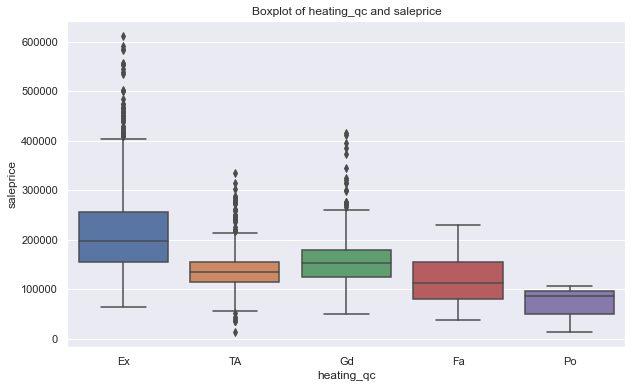

In [39]:
sns.boxplot(x='heating_qc', y = 'saleprice', data = df_train_clean)
plt.title('Boxplot of heating_qc and saleprice');

28. central_air: Proportion of houses with central air conditioning forms the majority (>75%). To drop this feature for modelling.

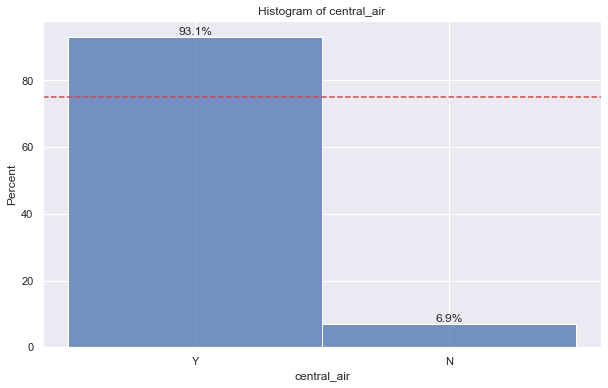

In [40]:
histplot('central_air')

29. electrical: Proportion of houses with electrical system SBrkr (Standard Circuit Breakers & Romex) forms the majority (>75%). To drop this feature for modelling.

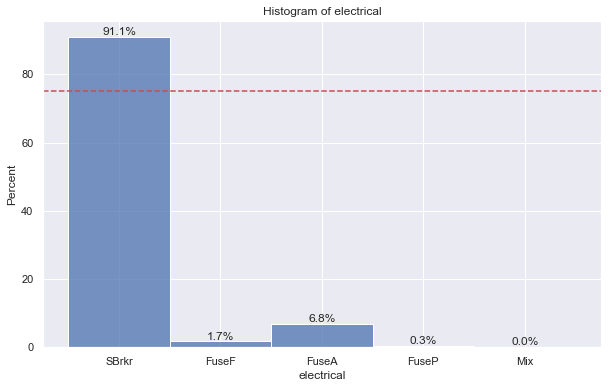

In [41]:
histplot('electrical')

30. kitchen_qual: Houses have a various kitchen quality. To keep this feature for modelling.

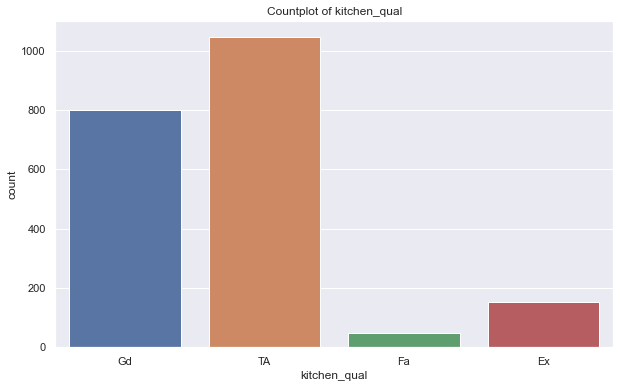

In [42]:
sns.countplot(x = 'kitchen_qual', data = df_train_clean)
plt.title('Countplot of kitchen_qual');

Based on the boxplot, sale price varies across the different kitchen quality. We want to select such features for our regression model. Median saleprice of houses decreases with decreasing kitchen quality. However, houses with excellent kitchen quality have median saleprice above 300K. This could probably be an important factor to drive up saleprice of houses if there are not many food options around the neighborhood and families would be required to cook their meals and would probably want a house with a better kitchen quality.

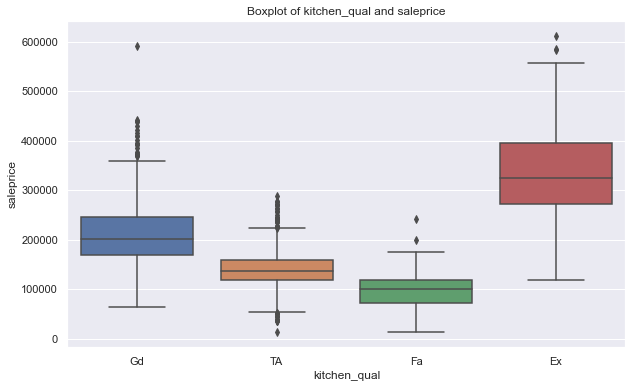

In [43]:
sns.boxplot(x='kitchen_qual', y = 'saleprice', data = df_train_clean)
plt.title('Boxplot of kitchen_qual and saleprice');

31. functional: Proportion of houses with home functionality Typ (Typical functionality) forms the majority (>75%). To drop this feature for modelling.

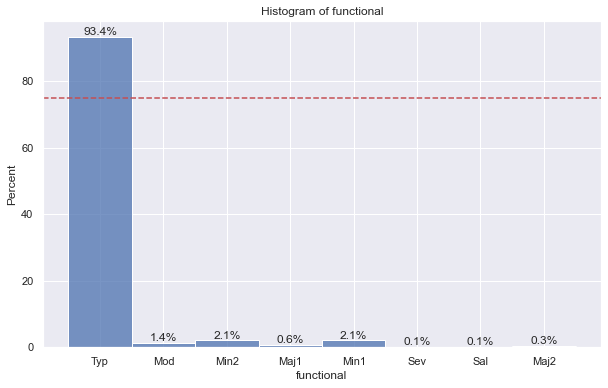

In [44]:
histplot('functional')

32. fireplace_qu: Houses have a various fireplace quality. To keep this feature for modelling.

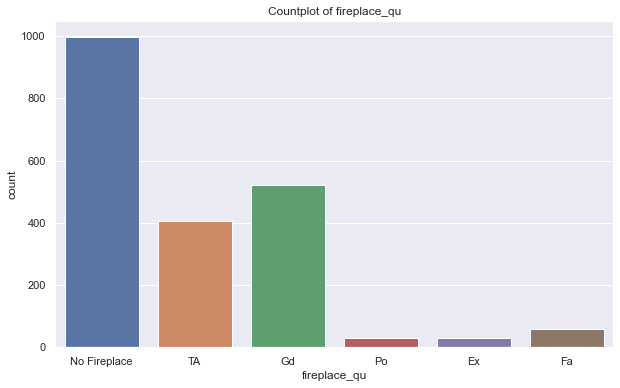

In [45]:
sns.countplot(x = 'fireplace_qu', data = df_train_clean)
plt.title('Countplot of fireplace_qu');

Based on the boxplot, sale price varies across the different fireplace quality. We want to select such features for our regression model. Median saleprice of houses decreases with decreasing fireplace quality. Similarly, houses with excellent fireplace quality have median saleprice above 300K. This is probably due to the fact that temperatures can go below 0 degree celsius in Iowa during the winter.

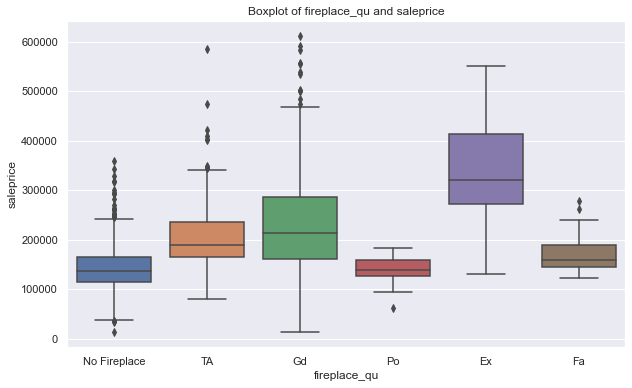

In [46]:
sns.boxplot(x='fireplace_qu', y = 'saleprice', data = df_train_clean)
plt.title('Boxplot of fireplace_qu and saleprice');

33. garage_type: Proportion of houses with garage location Attched (attached to home) and Detchd (sum of both > 75%) forms the majority. To drop this feature for modelling.

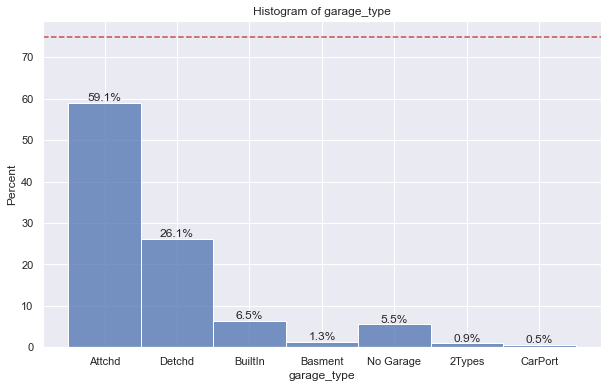

In [47]:
histplot('garage_type')

34. garage_finish: Houses have a various interior finish of garage. To keep this feature for modelling.

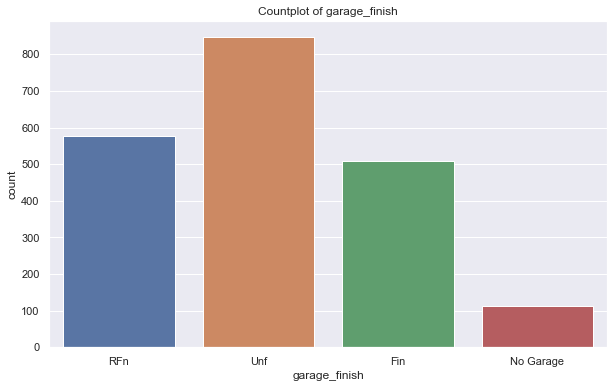

In [48]:
sns.countplot(x = 'garage_finish', data = df_train_clean)
plt.title('Countplot of garage_finish');

Based on the boxplot, sale price varies across interior finish of garage. We want to select such features for our regression model. Houses with finished interior of garage have higher median saleprices. Given that the average car ownership per household in Ames is 2 ([*source*](https://datausa.io/profile/geo/ames-ia/#housing)), a rough finished or finished garage would fetch a higher saleprice.

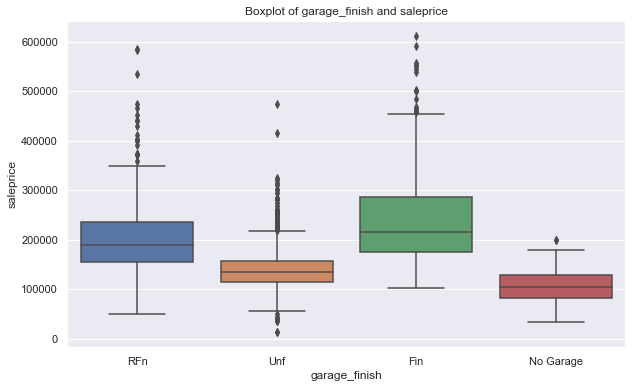

In [49]:
sns.boxplot(x='garage_finish', y = 'saleprice', data = df_train_clean)
plt.title('Boxplot of garage_finish and saleprice');

35. garage_qual: Proportion of houses with garage quality TA (Typical/Average) forms the majority (>75%). To drop this feature for modelling.

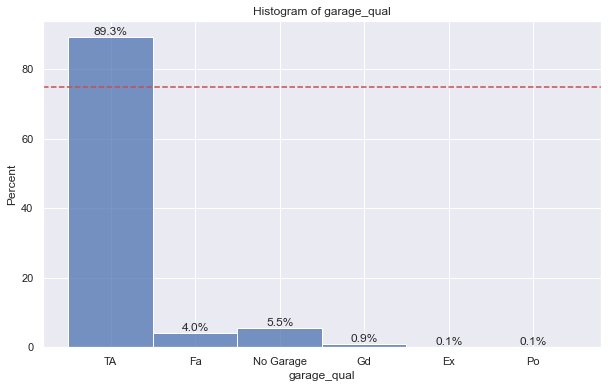

In [50]:
histplot('garage_qual')

36. garage_cond: Proportion of houses with garage condition TA (Typical/Average) forms the majority (>75%). To drop this feature for modelling.

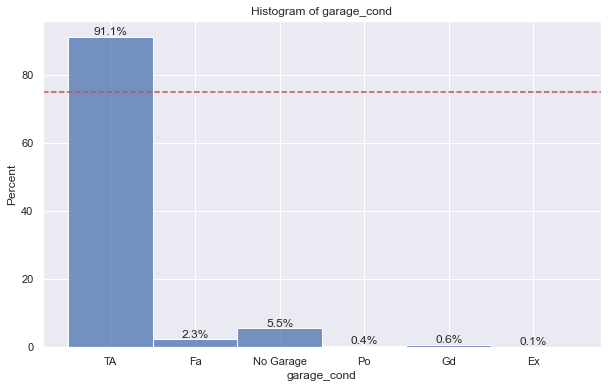

In [51]:
histplot('garage_cond')

37. paved_drive: Proportion of houses with paved driveway forms the majority (>75%). To drop this feature for modelling.

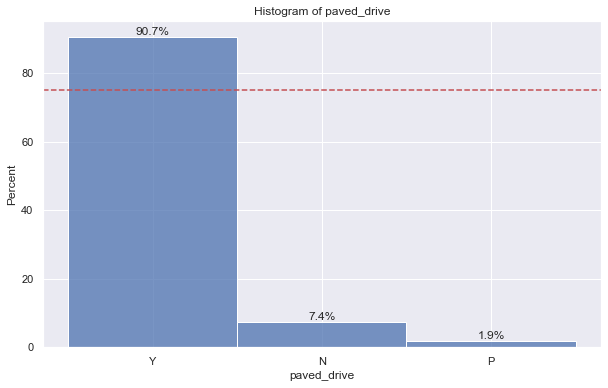

In [52]:
histplot('paved_drive')

38. sale_type: Proportion of houses with sale type WD (Warranty Deed - Conventional) forms the majority (>75%). To drop this feature for modelling.

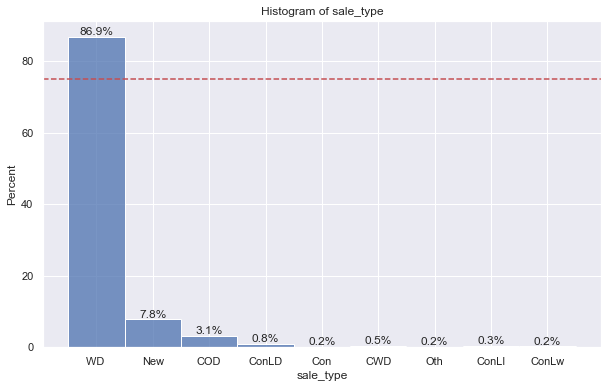

In [53]:
histplot('sale_type')

We have selected the following categorial variables as features for our regression models: <br>
1. neighborhood <br>
2. exterior_1st <br>
3. exterior_2nd <br>
4. exter_qual <br>
5. foundation <br>
6. bsmt_qual <br>
7. bsmt_exposure <br>
8. bsmtfin_type_1 <br>
9. heating_qc <br>
10. kitchen_qual <br>
11. fireplace_qu <br>
12. garage_finish

We first create a df of the 16 variables we have selected as features for the linear regression model and take a look at the df.

In [54]:
#select the features and predictor and save to new df
df_train_model = df_train_clean.filter(['overall_qual', 'log_gr_liv_area', 'garage_area', 'total_bsmt_sf', 'neighborhood', 'exterior_1st', 'exterior_2nd', 'exter_qual', 'foundation', 'bsmt_qual', 'bsmt_exposure', 'bsmtfin_type_1', 'heating_qc', 'kitchen_qual', 'fireplace_qu', 'garage_finish', 'saleprice'], axis=1)

#take a look at the df
df_train_model.head()

,overall_qual,log_gr_liv_area,garage_area,total_bsmt_sf,neighborhood,exterior_1st,exterior_2nd,exter_qual,foundation,bsmt_qual,bsmt_exposure,bsmtfin_type_1,heating_qc,kitchen_qual,fireplace_qu,garage_finish,saleprice
0,6,7.299121,475.0,725.0,Sawyer,HdBoard,Plywood,Gd,CBlock,TA,No,GLQ,Ex,Gd,No Fireplace,RFn,130500
1,7,7.660114,559.0,913.0,SawyerW,VinylSd,VinylSd,Gd,PConc,Gd,No,GLQ,Ex,Gd,TA,RFn,220000
2,5,6.963190,246.0,1057.0,NAmes,VinylSd,VinylSd,TA,CBlock,TA,No,GLQ,TA,Gd,No Fireplace,Unf,109000
3,5,7.275172,400.0,384.0,Timber,VinylSd,VinylSd,TA,PConc,Gd,No,Unf,Gd,TA,No Fireplace,Fin,174000
4,6,7.275865,484.0,676.0,SawyerW,Wd Sdng,Plywood,TA,PConc,Fa,No,Unf,TA,TA,No Fireplace,Unf,138500


Save the df into a new csv file

In [55]:
df_train_model.to_csv('../Dataset/train_model.csv', index = False)